referensi https://www.youtube.com/watch?v=wElwOM88xJQ

In [1]:
# pip install graphviz

In [1]:
#libraries buat seleksi fitur
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif,SelectKBest 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree

#libraries buat klasifikasi
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import graphviz
import time
import sys

In [2]:
#import dataset
df = pd.read_csv('nirsMangga.csv')

# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['No', 'Mango Cultivars', 'Vit C (mg/100g)', 'TA (mg/100g)', 'SSC (oBrix)', 'label'], axis=1),
    df['label'],
    test_size=0.3,
    random_state=0)

x_train.head()

,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003,1003.4,...,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2
16,0.471459,0.471074,0.470934,0.470379,0.470260,0.469880,0.469497,0.469435,0.469454,0.468998,...,1.413537,1.415740,1.417568,1.419698,1.421711,1.423070,1.424394,1.426121,1.427552,1.428625
51,0.433239,0.432622,0.432626,0.432379,0.431620,0.430710,0.430836,0.430847,0.430188,0.429470,...,1.601232,1.602877,1.604524,1.605982,1.606778,1.607837,1.608756,1.609967,1.610900,1.611099
183,0.545045,0.544204,0.543792,0.543596,0.543338,0.542534,0.541493,0.541139,0.541308,0.540831,...,1.524657,1.525973,1.527454,1.529518,1.530097,1.530315,1.530254,1.531191,1.532366,1.533183
145,0.545846,0.544815,0.544524,0.544631,0.544169,0.543143,0.542535,0.542080,0.541842,0.541258,...,1.421962,1.422955,1.423717,1.424639,1.425080,1.425797,1.426503,1.427164,1.427838,1.428271
40,0.381048,0.380483,0.380541,0.380151,0.379599,0.379189,0.379009,0.378722,0.378309,0.377719,...,1.571125,1.572674,1.574303,1.576075,1.577273,1.577980,1.578561,1.579334,1.580042,1.581424


# Seleksi Fitur ANOVA

In [3]:
# Define ANOVA feature selection
fs = SelectKBest(score_func=f_classif,k=100)

In [4]:
%%time

# Apply feature selection
fs.fit(x_train,y_train)

CPU times: user 16.5 ms, sys: 0 ns, total: 16.5 ms
Wall time: 13.7 ms


SelectKBest(k=100)

In [5]:
# Create features score, features p_value, and features name
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(x_train.columns)
features_score = pd.concat([features,features_score,features_pvalue],axis=1)

#reset index, supaya tidak ada nilai nan di dataframe yg dibikin
features_score.reset_index(drop=True, inplace=True)
features_pvalue.reset_index(drop=True, inplace=True)
features.reset_index(drop=True, inplace=True)

# Assign the column name
features_score.columns = ["Input_Features","Score","P_Value"]

# Print features score
print(features_score.nlargest(100,columns="Score"))

    Input_Features      Score  P_Value
220         1092.6  46.849895      0.0
221         1093.1  46.840097      0.0
229         1096.8  46.819700      0.0
214         1089.8  46.809279      0.0
226         1095.4  46.798650      0.0
..             ...        ...      ...
271         1116.6  46.139463      0.0
175         1072.3  46.098527      0.0
274           1118  46.079169      0.0
174         1071.8  46.063684      0.0
169         1069.6  46.054953      0.0

[100 rows x 3 columns]


In [19]:
print("Fitur yang dipilih : " + str(features_score.Input_Features.to_string(index=False).tolist()))
print("Total fitur yang dipilih : " + str(len(df_fitur_terpilih.index)))

AttributeError: 'str' object has no attribute 'tolist'

In [43]:
print(features_score.nlargest(100,columns="Score").iloc[:,0].values.flatten().tolist())

['1092.6', '1093.1', '1096.8', '1089.8', '1095.4', '1095.8', '1097.2', '1103.3', '1102.8', '1102.4', '1094.4', '1091.7', '1092.1', '1094', '1089.4', '1091.2', '1098.6', '1096.3', '1103.8', '1094.9', '1093.5', '1107.1', '1100.9', '1100.5', '1086.6', '1087.1', '1104.7', '1101.9', '1099.5', '1100', '1104.2', '1099.1', '1106.6', '1097.7', '1090.3', '1098.2', '1101.4', '1084.4', '1090.8', '1085.3', '1105.2', '1085.7', '1106.1', '1107.5', '1105.6', '1088.9', '1109', '1087.6', '1086.2', '1083.9', '1079.9', '1108.5', '1084.8', '1108', '1080.3', '1088.5', '1079.4', '1082.1', '1088', '1080.8', '1109.4', '1109.9', '1110.4', '1081.7', '1083.5', '1079', '1081.2', '1082.6', '1083', '1110.9', '1077.6', '1074.5', '1078.5', '1074.9', '1112.3', '1112.8', '1078.1', '1076.3', '1077.2', '1075.8', '1114.2', '1076.7', '1111.3', '1074', '1075.4', '1113.2', '1114.7', '1116.1', '1113.7', '1115.6', '1111.8', '1073.2', '1072.7', '1073.6', '1115.2', '1116.6', '1072.3', '1118', '1071.8', '1069.6']


# Klasifikasi Random Forest Classifier

In [32]:
#buat n-fold cv
#cross validation 10-fold
cv = KFold(n_splits=10, random_state=1, shuffle=True)

## Testing Performa Model Random Forest Classifier

In [7]:
%%time

#tentukan metode scoring yang digunakan
scoring_rfe = {'acc': 'accuracy',
               'prec_micro': 'precision_micro',
               'rec_micro': 'recall_micro'}

#tentukan total fitur dan trees yang digunakan dalam proses klasifikasi ini
n_feat = range(1, 101)
n_trees = [100]

for nfeat in n_feat:
    for ntrees in n_trees:
        print("==================================================")
        start_time = time.time()
        
        #ambil n fitur input hasil seleksi fitur MI
        x_train_selected = x_train[features_score.nlargest(100,columns="Score").iloc[0:nfeat, 0]]
        x_test_selected = x_test[features_score.nlargest(100,columns="Score").iloc[0:nfeat, 0]]

        #Create a Gaussian Classifier
        clf_rfe = RandomForestClassifier(n_estimators=ntrees)
        
        #Train the model using the training sets
        clf_rfe.fit(x_train_selected, y_train)
        y_pred_rfe=clf_rfe.predict(x_test_selected)
        
        #hitung score model dari data train
        scores_rfe = cross_validate(clf_rfe, x_train_selected, y_train, scoring=scoring_rfe, cv=cv, return_train_score=True)
        
        print("Akurasi model RFE data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(scores_rfe['train_acc'].mean(), 2)))
        print("Akurasi model RFE data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(metrics.accuracy_score(y_test, y_pred_rfe), 2)))
        print("Precision model RFE data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(scores_rfe['train_prec_micro'].mean(), 2)))
        print("Precision model RFE data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(metrics.precision_score(y_test, y_pred_rfe, average='micro'), 2)))
        print("Recall model RFE data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(scores_rfe['train_rec_micro'].mean(), 2)))
        print("Recall model RFE data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(metrics.recall_score(y_test, y_pred_rfe, average='micro'), 2)))
        print(" ")
        
        max_acc = 0
        max_prec = 0
        max_rec = 0
        
        if(round(metrics.accuracy_score(y_test, y_pred_rfe), 2) > max_acc):
            max_acc = round(metrics.accuracy_score(y_test, y_pred_rfe), 2)
        
        if(round(metrics.precision_score(y_test, y_pred_rfe, average='micro'), 2) > max_prec):
            max_prec = round(metrics.precision_score(y_test, y_pred_rfe, average='micro'), 2)
            
        if(round(metrics.recall_score(y_test, y_pred_rfe, average='micro'), 2) > max_rec):
            max_rec = round(metrics.recall_score(y_test, y_pred_rfe, average='micro'), 2)
            
        end_time = time.time()
        print("Total waktu: ", end_time - start_time)

print("====Nilai Performa Tertinggi====")
print("Nilai akurasi model tertinggi: " + str(max_acc))
print("Nilai presisi model tertinggi: " + str(max_prec))
print("Nilai Recall model tertinggi: " + str(max_rec))

Akurasi model RFE data Train dengan 1 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 1 fitur dan 100 trees:0.8
Precision model RFE data Train dengan 1 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 1 fitur dan 100 trees:0.8
Recall model RFE data Train dengan 1 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 1 fitur dan 100 trees:0.8
 
Total waktu:  1.3431718349456787
Akurasi model RFE data Train dengan 2 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 2 fitur dan 100 trees:0.79
Precision model RFE data Train dengan 2 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 2 fitur dan 100 trees:0.79
Recall model RFE data Train dengan 2 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 2 fitur dan 100 trees:0.79
 
Total waktu:  1.3485581874847412
Akurasi model RFE data Train dengan 3 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 3 fitur dan 100 trees:0.82
Precision model RFE data Train dengan 3 fitur dan 100 trees:1

Akurasi model RFE data Train dengan 19 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 19 fitur dan 100 trees:0.82
Precision model RFE data Train dengan 19 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 19 fitur dan 100 trees:0.82
Recall model RFE data Train dengan 19 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 19 fitur dan 100 trees:0.82
 
Total waktu:  1.3258326053619385
Akurasi model RFE data Train dengan 20 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 20 fitur dan 100 trees:0.82
Precision model RFE data Train dengan 20 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 20 fitur dan 100 trees:0.82
Recall model RFE data Train dengan 20 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 20 fitur dan 100 trees:0.82
 
Total waktu:  1.3139655590057373
Akurasi model RFE data Train dengan 21 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 21 fitur dan 100 trees:0.82
Precision model RFE data Train dengan 21 fit

Akurasi model RFE data Train dengan 37 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 37 fitur dan 100 trees:0.82
Precision model RFE data Train dengan 37 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 37 fitur dan 100 trees:0.82
Recall model RFE data Train dengan 37 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 37 fitur dan 100 trees:0.82
 
Total waktu:  1.295172929763794
Akurasi model RFE data Train dengan 38 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 38 fitur dan 100 trees:0.84
Precision model RFE data Train dengan 38 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 38 fitur dan 100 trees:0.84
Recall model RFE data Train dengan 38 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 38 fitur dan 100 trees:0.84
 
Total waktu:  1.2993700504302979
Akurasi model RFE data Train dengan 39 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 39 fitur dan 100 trees:0.82
Precision model RFE data Train dengan 39 fitu

Akurasi model RFE data Train dengan 55 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 55 fitur dan 100 trees:0.84
Precision model RFE data Train dengan 55 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 55 fitur dan 100 trees:0.84
Recall model RFE data Train dengan 55 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 55 fitur dan 100 trees:0.84
 
Total waktu:  1.2938082218170166
Akurasi model RFE data Train dengan 56 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 56 fitur dan 100 trees:0.82
Precision model RFE data Train dengan 56 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 56 fitur dan 100 trees:0.82
Recall model RFE data Train dengan 56 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 56 fitur dan 100 trees:0.82
 
Total waktu:  1.2958879470825195
Akurasi model RFE data Train dengan 57 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 57 fitur dan 100 trees:0.82
Precision model RFE data Train dengan 57 fit

Akurasi model RFE data Train dengan 73 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 73 fitur dan 100 trees:0.88
Precision model RFE data Train dengan 73 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 73 fitur dan 100 trees:0.88
Recall model RFE data Train dengan 73 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 73 fitur dan 100 trees:0.88
 
Total waktu:  1.3443338871002197
Akurasi model RFE data Train dengan 74 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 74 fitur dan 100 trees:0.84
Precision model RFE data Train dengan 74 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 74 fitur dan 100 trees:0.84
Recall model RFE data Train dengan 74 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 74 fitur dan 100 trees:0.84
 
Total waktu:  1.344402551651001
Akurasi model RFE data Train dengan 75 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 75 fitur dan 100 trees:0.86
Precision model RFE data Train dengan 75 fitu

Akurasi model RFE data Train dengan 91 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 91 fitur dan 100 trees:0.84
Precision model RFE data Train dengan 91 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 91 fitur dan 100 trees:0.84
Recall model RFE data Train dengan 91 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 91 fitur dan 100 trees:0.84
 
Total waktu:  1.3711605072021484
Akurasi model RFE data Train dengan 92 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 92 fitur dan 100 trees:0.89
Precision model RFE data Train dengan 92 fitur dan 100 trees:1.0
Precision model RFE data Test dengan 92 fitur dan 100 trees:0.89
Recall model RFE data Train dengan 92 fitur dan 100 trees:1.0
Recall model RFE data Test dengan 92 fitur dan 100 trees:0.89
 
Total waktu:  1.3755955696105957
Akurasi model RFE data Train dengan 93 fitur dan 100 trees:1.0
Akurasi model RFE data Test dengan 93 fitur dan 100 trees:0.86
Precision model RFE data Train dengan 93 fit

In [8]:
%%time

#tentukan metode scoring yang digunakan
scoring_rfe = {'acc': 'accuracy',
               'prec_micro': 'precision_micro',
               'rec_micro': 'recall_micro'}

#tentukan total fitur dan trees yang digunakan dalam proses klasifikasi ini
n_feat = range(1, 101)
n_trees = [150]

for nfeat in n_feat:
    for ntrees in n_trees:
        print("==================================================")
        start_time = time.time()
        
        #ambil n fitur input hasil seleksi fitur MI
        x_train_selected = x_train[features_score.nlargest(100,columns="Score").iloc[0:nfeat, 0]]
        x_test_selected = x_test[features_score.nlargest(100,columns="Score").iloc[0:nfeat, 0]]

        #Create a Gaussian Classifier
        clf_rfe = RandomForestClassifier(n_estimators=ntrees)
        
        #Train the model using the training sets
        clf_rfe.fit(x_train_selected, y_train)
        y_pred_rfe=clf_rfe.predict(x_test_selected)
        
        #hitung score model dari data train
        scores_rfe = cross_validate(clf_rfe, x_train_selected, y_train, scoring=scoring_rfe, cv=cv, return_train_score=True)
        
        print("Akurasi model RFE data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(scores_rfe['train_acc'].mean(), 2)))
        print("Akurasi model RFE data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(metrics.accuracy_score(y_test, y_pred_rfe), 2)))
        print("Precision model RFE data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(scores_rfe['train_prec_micro'].mean(), 2)))
        print("Precision model RFE data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(metrics.precision_score(y_test, y_pred_rfe, average='micro'), 2)))
        print("Recall model RFE data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(scores_rfe['train_rec_micro'].mean(), 2)))
        print("Recall model RFE data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(metrics.recall_score(y_test, y_pred_rfe, average='micro'), 2)))
        print(" ")
        
        max_acc = 0
        max_prec = 0
        max_rec = 0
        
        if(round(metrics.accuracy_score(y_test, y_pred_rfe), 2) > max_acc):
            max_acc = round(metrics.accuracy_score(y_test, y_pred_rfe), 2)
        
        if(round(metrics.precision_score(y_test, y_pred_rfe, average='micro'), 2) > max_prec):
            max_prec = round(metrics.precision_score(y_test, y_pred_rfe, average='micro'), 2)
            
        if(round(metrics.recall_score(y_test, y_pred_rfe, average='micro'), 2) > max_rec):
            max_rec = round(metrics.recall_score(y_test, y_pred_rfe, average='micro'), 2)
            
        end_time = time.time()
        print("Total waktu: ", end_time - start_time)

print("====Nilai Performa Tertinggi====")
print("Nilai akurasi model tertinggi: " + str(max_acc))
print("Nilai presisi model tertinggi: " + str(max_prec))
print("Nilai Recall model tertinggi: " + str(max_rec))

Akurasi model RFE data Train dengan 1 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 1 fitur dan 150 trees:0.8
Precision model RFE data Train dengan 1 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 1 fitur dan 150 trees:0.8
Recall model RFE data Train dengan 1 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 1 fitur dan 150 trees:0.8
 
Total waktu:  1.840688943862915
Akurasi model RFE data Train dengan 2 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 2 fitur dan 150 trees:0.79
Precision model RFE data Train dengan 2 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 2 fitur dan 150 trees:0.79
Recall model RFE data Train dengan 2 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 2 fitur dan 150 trees:0.79
 
Total waktu:  1.74338960647583
Akurasi model RFE data Train dengan 3 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 3 fitur dan 150 trees:0.8
Precision model RFE data Train dengan 3 fitur dan 150 trees:1.0
P

Akurasi model RFE data Train dengan 19 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 19 fitur dan 150 trees:0.82
Precision model RFE data Train dengan 19 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 19 fitur dan 150 trees:0.82
Recall model RFE data Train dengan 19 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 19 fitur dan 150 trees:0.82
 
Total waktu:  1.8934674263000488
Akurasi model RFE data Train dengan 20 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 20 fitur dan 150 trees:0.82
Precision model RFE data Train dengan 20 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 20 fitur dan 150 trees:0.82
Recall model RFE data Train dengan 20 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 20 fitur dan 150 trees:0.82
 
Total waktu:  1.891284465789795
Akurasi model RFE data Train dengan 21 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 21 fitur dan 150 trees:0.82
Precision model RFE data Train dengan 21 fitu

Akurasi model RFE data Train dengan 37 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 37 fitur dan 150 trees:0.82
Precision model RFE data Train dengan 37 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 37 fitur dan 150 trees:0.82
Recall model RFE data Train dengan 37 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 37 fitur dan 150 trees:0.82
 
Total waktu:  1.9024229049682617
Akurasi model RFE data Train dengan 38 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 38 fitur dan 150 trees:0.82
Precision model RFE data Train dengan 38 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 38 fitur dan 150 trees:0.82
Recall model RFE data Train dengan 38 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 38 fitur dan 150 trees:0.82
 
Total waktu:  1.9027197360992432
Akurasi model RFE data Train dengan 39 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 39 fitur dan 150 trees:0.82
Precision model RFE data Train dengan 39 fit

Akurasi model RFE data Train dengan 55 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 55 fitur dan 150 trees:0.86
Precision model RFE data Train dengan 55 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 55 fitur dan 150 trees:0.86
Recall model RFE data Train dengan 55 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 55 fitur dan 150 trees:0.86
 
Total waktu:  1.9360389709472656
Akurasi model RFE data Train dengan 56 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 56 fitur dan 150 trees:0.84
Precision model RFE data Train dengan 56 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 56 fitur dan 150 trees:0.84
Recall model RFE data Train dengan 56 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 56 fitur dan 150 trees:0.84
 
Total waktu:  1.9328527450561523
Akurasi model RFE data Train dengan 57 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 57 fitur dan 150 trees:0.84
Precision model RFE data Train dengan 57 fit

Akurasi model RFE data Train dengan 73 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 73 fitur dan 150 trees:0.86
Precision model RFE data Train dengan 73 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 73 fitur dan 150 trees:0.86
Recall model RFE data Train dengan 73 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 73 fitur dan 150 trees:0.86
 
Total waktu:  1.9822971820831299
Akurasi model RFE data Train dengan 74 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 74 fitur dan 150 trees:0.84
Precision model RFE data Train dengan 74 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 74 fitur dan 150 trees:0.84
Recall model RFE data Train dengan 74 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 74 fitur dan 150 trees:0.84
 
Total waktu:  1.9650325775146484
Akurasi model RFE data Train dengan 75 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 75 fitur dan 150 trees:0.86
Precision model RFE data Train dengan 75 fit

Akurasi model RFE data Train dengan 91 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 91 fitur dan 150 trees:0.88
Precision model RFE data Train dengan 91 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 91 fitur dan 150 trees:0.88
Recall model RFE data Train dengan 91 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 91 fitur dan 150 trees:0.88
 
Total waktu:  2.006213903427124
Akurasi model RFE data Train dengan 92 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 92 fitur dan 150 trees:0.86
Precision model RFE data Train dengan 92 fitur dan 150 trees:1.0
Precision model RFE data Test dengan 92 fitur dan 150 trees:0.86
Recall model RFE data Train dengan 92 fitur dan 150 trees:1.0
Recall model RFE data Test dengan 92 fitur dan 150 trees:0.86
 
Total waktu:  1.990083932876587
Akurasi model RFE data Train dengan 93 fitur dan 150 trees:1.0
Akurasi model RFE data Test dengan 93 fitur dan 150 trees:0.88
Precision model RFE data Train dengan 93 fitur

In [9]:
%%time

#tentukan metode scoring yang digunakan
scoring_rfe = {'acc': 'accuracy',
               'prec_micro': 'precision_micro',
               'rec_micro': 'recall_micro'}

#tentukan total fitur dan trees yang digunakan dalam proses klasifikasi ini
n_feat = range(1, 101)
n_trees = [200]

for nfeat in n_feat:
    for ntrees in n_trees:
        print("==================================================")
        start_time = time.time()
        
        #ambil n fitur input hasil seleksi fitur MI
        x_train_selected = x_train[features_score.nlargest(100,columns="Score").iloc[0:nfeat, 0]]
        x_test_selected = x_test[features_score.nlargest(100,columns="Score").iloc[0:nfeat, 0]]

        #Create a Gaussian Classifier
        clf_rfe = RandomForestClassifier(n_estimators=ntrees)
        
        #Train the model using the training sets
        clf_rfe.fit(x_train_selected, y_train)
        y_pred_rfe=clf_rfe.predict(x_test_selected)
        
        #hitung score model dari data train
        scores_rfe = cross_validate(clf_rfe, x_train_selected, y_train, scoring=scoring_rfe, cv=cv, return_train_score=True)
        
        print("Akurasi model RFE data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(scores_rfe['train_acc'].mean(), 2)))
        print("Akurasi model RFE data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(metrics.accuracy_score(y_test, y_pred_rfe), 2)))
        print("Precision model RFE data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(scores_rfe['train_prec_micro'].mean(), 2)))
        print("Precision model RFE data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(metrics.precision_score(y_test, y_pred_rfe, average='micro'), 2)))
        print("Recall model RFE data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(scores_rfe['train_rec_micro'].mean(), 2)))
        print("Recall model RFE data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(round(metrics.recall_score(y_test, y_pred_rfe, average='micro'), 2)))
        print(" ")
        
        max_acc = 0
        max_prec = 0
        max_rec = 0
        
        if(round(metrics.accuracy_score(y_test, y_pred_rfe), 2) > max_acc):
            max_acc = round(metrics.accuracy_score(y_test, y_pred_rfe), 2)
        
        if(round(metrics.precision_score(y_test, y_pred_rfe, average='micro'), 2) > max_prec):
            max_prec = round(metrics.precision_score(y_test, y_pred_rfe, average='micro'), 2)
            
        if(round(metrics.recall_score(y_test, y_pred_rfe, average='micro'), 2) > max_rec):
            max_rec = round(metrics.recall_score(y_test, y_pred_rfe, average='micro'), 2)
            
        end_time = time.time()
        print("Total waktu: ", end_time - start_time)

print("====Nilai Performa Tertinggi====")
print("Nilai akurasi model tertinggi: " + str(max_acc))
print("Nilai presisi model tertinggi: " + str(max_prec))
print("Nilai Recall model tertinggi: " + str(max_rec))

Akurasi model RFE data Train dengan 1 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 1 fitur dan 200 trees:0.8
Precision model RFE data Train dengan 1 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 1 fitur dan 200 trees:0.8
Recall model RFE data Train dengan 1 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 1 fitur dan 200 trees:0.8
 
Total waktu:  2.310631513595581
Akurasi model RFE data Train dengan 2 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 2 fitur dan 200 trees:0.79
Precision model RFE data Train dengan 2 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 2 fitur dan 200 trees:0.79
Recall model RFE data Train dengan 2 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 2 fitur dan 200 trees:0.79
 
Total waktu:  2.3011653423309326
Akurasi model RFE data Train dengan 3 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 3 fitur dan 200 trees:0.8
Precision model RFE data Train dengan 3 fitur dan 200 trees:1.0

Akurasi model RFE data Train dengan 19 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 19 fitur dan 200 trees:0.84
Precision model RFE data Train dengan 19 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 19 fitur dan 200 trees:0.84
Recall model RFE data Train dengan 19 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 19 fitur dan 200 trees:0.84
 
Total waktu:  2.4304776191711426
Akurasi model RFE data Train dengan 20 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 20 fitur dan 200 trees:0.82
Precision model RFE data Train dengan 20 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 20 fitur dan 200 trees:0.82
Recall model RFE data Train dengan 20 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 20 fitur dan 200 trees:0.82
 
Total waktu:  2.4297683238983154
Akurasi model RFE data Train dengan 21 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 21 fitur dan 200 trees:0.84
Precision model RFE data Train dengan 21 fit

Akurasi model RFE data Train dengan 37 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 37 fitur dan 200 trees:0.82
Precision model RFE data Train dengan 37 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 37 fitur dan 200 trees:0.82
Recall model RFE data Train dengan 37 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 37 fitur dan 200 trees:0.82
 
Total waktu:  2.5031495094299316
Akurasi model RFE data Train dengan 38 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 38 fitur dan 200 trees:0.82
Precision model RFE data Train dengan 38 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 38 fitur dan 200 trees:0.82
Recall model RFE data Train dengan 38 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 38 fitur dan 200 trees:0.82
 
Total waktu:  2.5054118633270264
Akurasi model RFE data Train dengan 39 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 39 fitur dan 200 trees:0.82
Precision model RFE data Train dengan 39 fit

Akurasi model RFE data Train dengan 55 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 55 fitur dan 200 trees:0.84
Precision model RFE data Train dengan 55 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 55 fitur dan 200 trees:0.84
Recall model RFE data Train dengan 55 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 55 fitur dan 200 trees:0.84
 
Total waktu:  2.5626704692840576
Akurasi model RFE data Train dengan 56 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 56 fitur dan 200 trees:0.84
Precision model RFE data Train dengan 56 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 56 fitur dan 200 trees:0.84
Recall model RFE data Train dengan 56 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 56 fitur dan 200 trees:0.84
 
Total waktu:  2.553438186645508
Akurasi model RFE data Train dengan 57 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 57 fitur dan 200 trees:0.86
Precision model RFE data Train dengan 57 fitu

Akurasi model RFE data Train dengan 73 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 73 fitur dan 200 trees:0.86
Precision model RFE data Train dengan 73 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 73 fitur dan 200 trees:0.86
Recall model RFE data Train dengan 73 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 73 fitur dan 200 trees:0.86
 
Total waktu:  2.5963215827941895
Akurasi model RFE data Train dengan 74 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 74 fitur dan 200 trees:0.84
Precision model RFE data Train dengan 74 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 74 fitur dan 200 trees:0.84
Recall model RFE data Train dengan 74 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 74 fitur dan 200 trees:0.84
 
Total waktu:  2.607651948928833
Akurasi model RFE data Train dengan 75 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 75 fitur dan 200 trees:0.86
Precision model RFE data Train dengan 75 fitu

Akurasi model RFE data Train dengan 91 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 91 fitur dan 200 trees:0.88
Precision model RFE data Train dengan 91 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 91 fitur dan 200 trees:0.88
Recall model RFE data Train dengan 91 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 91 fitur dan 200 trees:0.88
 
Total waktu:  2.641174793243408
Akurasi model RFE data Train dengan 92 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 92 fitur dan 200 trees:0.86
Precision model RFE data Train dengan 92 fitur dan 200 trees:1.0
Precision model RFE data Test dengan 92 fitur dan 200 trees:0.86
Recall model RFE data Train dengan 92 fitur dan 200 trees:1.0
Recall model RFE data Test dengan 92 fitur dan 200 trees:0.86
 
Total waktu:  2.6401712894439697
Akurasi model RFE data Train dengan 93 fitur dan 200 trees:1.0
Akurasi model RFE data Test dengan 93 fitur dan 200 trees:0.84
Precision model RFE data Train dengan 93 fitu

In [9]:
scores_rfe

{'fit_time': array([0.123384  , 0.12565851, 0.12383604, 0.12509203, 0.12326169,
        0.12368035, 0.12283349, 0.12289858, 0.12684655, 0.12241077]),
 'score_time': array([0.01214027, 0.01237178, 0.01143098, 0.01175261, 0.01163864,
        0.01136041, 0.01140165, 0.01160336, 0.01227117, 0.01065922]),
 'test_acc': array([0.69230769, 0.76923077, 0.61538462, 0.53846154, 0.76923077,
        0.76923077, 0.61538462, 0.69230769, 0.76923077, 0.53846154]),
 'train_acc': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_prec_micro': array([0.69230769, 0.76923077, 0.61538462, 0.53846154, 0.76923077,
        0.76923077, 0.61538462, 0.69230769, 0.76923077, 0.53846154]),
 'train_prec_micro': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_rec_micro': array([0.69230769, 0.76923077, 0.61538462, 0.53846154, 0.76923077,
        0.76923077, 0.61538462, 0.69230769, 0.76923077, 0.53846154]),
 'train_rec_micro': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [10]:
clf_rfe.predict(x_test_selected)

array([4, 2, 1, 3, 3, 3, 2, 4, 2, 4, 1, 4, 1, 4, 3, 4, 2, 4, 3, 3, 3, 3,
       3, 3, 4, 4, 3, 3, 4, 1, 1, 3, 4, 3, 2, 2, 4, 3, 3, 4, 3, 4, 4, 3,
       2, 2, 2, 1, 3, 4, 3, 2, 3, 4, 3, 3])

In [11]:
y_test

106    4
45     2
158    3
63     3
135    3
66     3
18     2
109    4
141    3
7      1
5      1
162    4
153    3
176    4
118    3
97     4
37     2
93     4
134    3
126    3
55     3
83     3
56     3
149    3
167    4
163    4
74     3
111    4
171    4
33     2
4      1
121    3
168    4
61     3
44     2
26     2
185    4
136    3
139    3
8      1
113    4
170    4
92     4
86     3
143    3
24     2
30     2
110    4
60     3
108    4
71     3
19     2
155    3
169    4
54     3
151    3
Name: label, dtype: int64

[Text(0.5128205128205128, 0.9583333333333334, '1096.8 <= 0.354\ngini = 0.674\nsamples = 81\nvalue = [16, 21, 62, 31]\nclass = b'),
 Text(0.48717948717948717, 0.875, 'gini = 0.0\nsamples = 11\nvalue = [0, 19, 0, 0]\nclass = a'),
 Text(0.5384615384615384, 0.875, '1095.4 <= 0.437\ngini = 0.589\nsamples = 70\nvalue = [16, 2, 62, 31]\nclass = b'),
 Text(0.23076923076923078, 0.7916666666666666, '1095.8 <= 0.403\ngini = 0.437\nsamples = 45\nvalue = [8, 2, 54, 10]\nclass = b'),
 Text(0.10256410256410256, 0.7083333333333334, '1095.4 <= 0.373\ngini = 0.184\nsamples = 17\nvalue = [0, 2, 27, 1]\nclass = b'),
 Text(0.05128205128205128, 0.625, '1096.8 <= 0.37\ngini = 0.408\nsamples = 3\nvalue = [0, 2, 5, 0]\nclass = b'),
 Text(0.02564102564102564, 0.5416666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 5, 0]\nclass = b'),
 Text(0.07692307692307693, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0, 0]\nclass = a'),
 Text(0.15384615384615385, 0.625, '1095.8 <= 0.39\ngini = 0.083\nsa

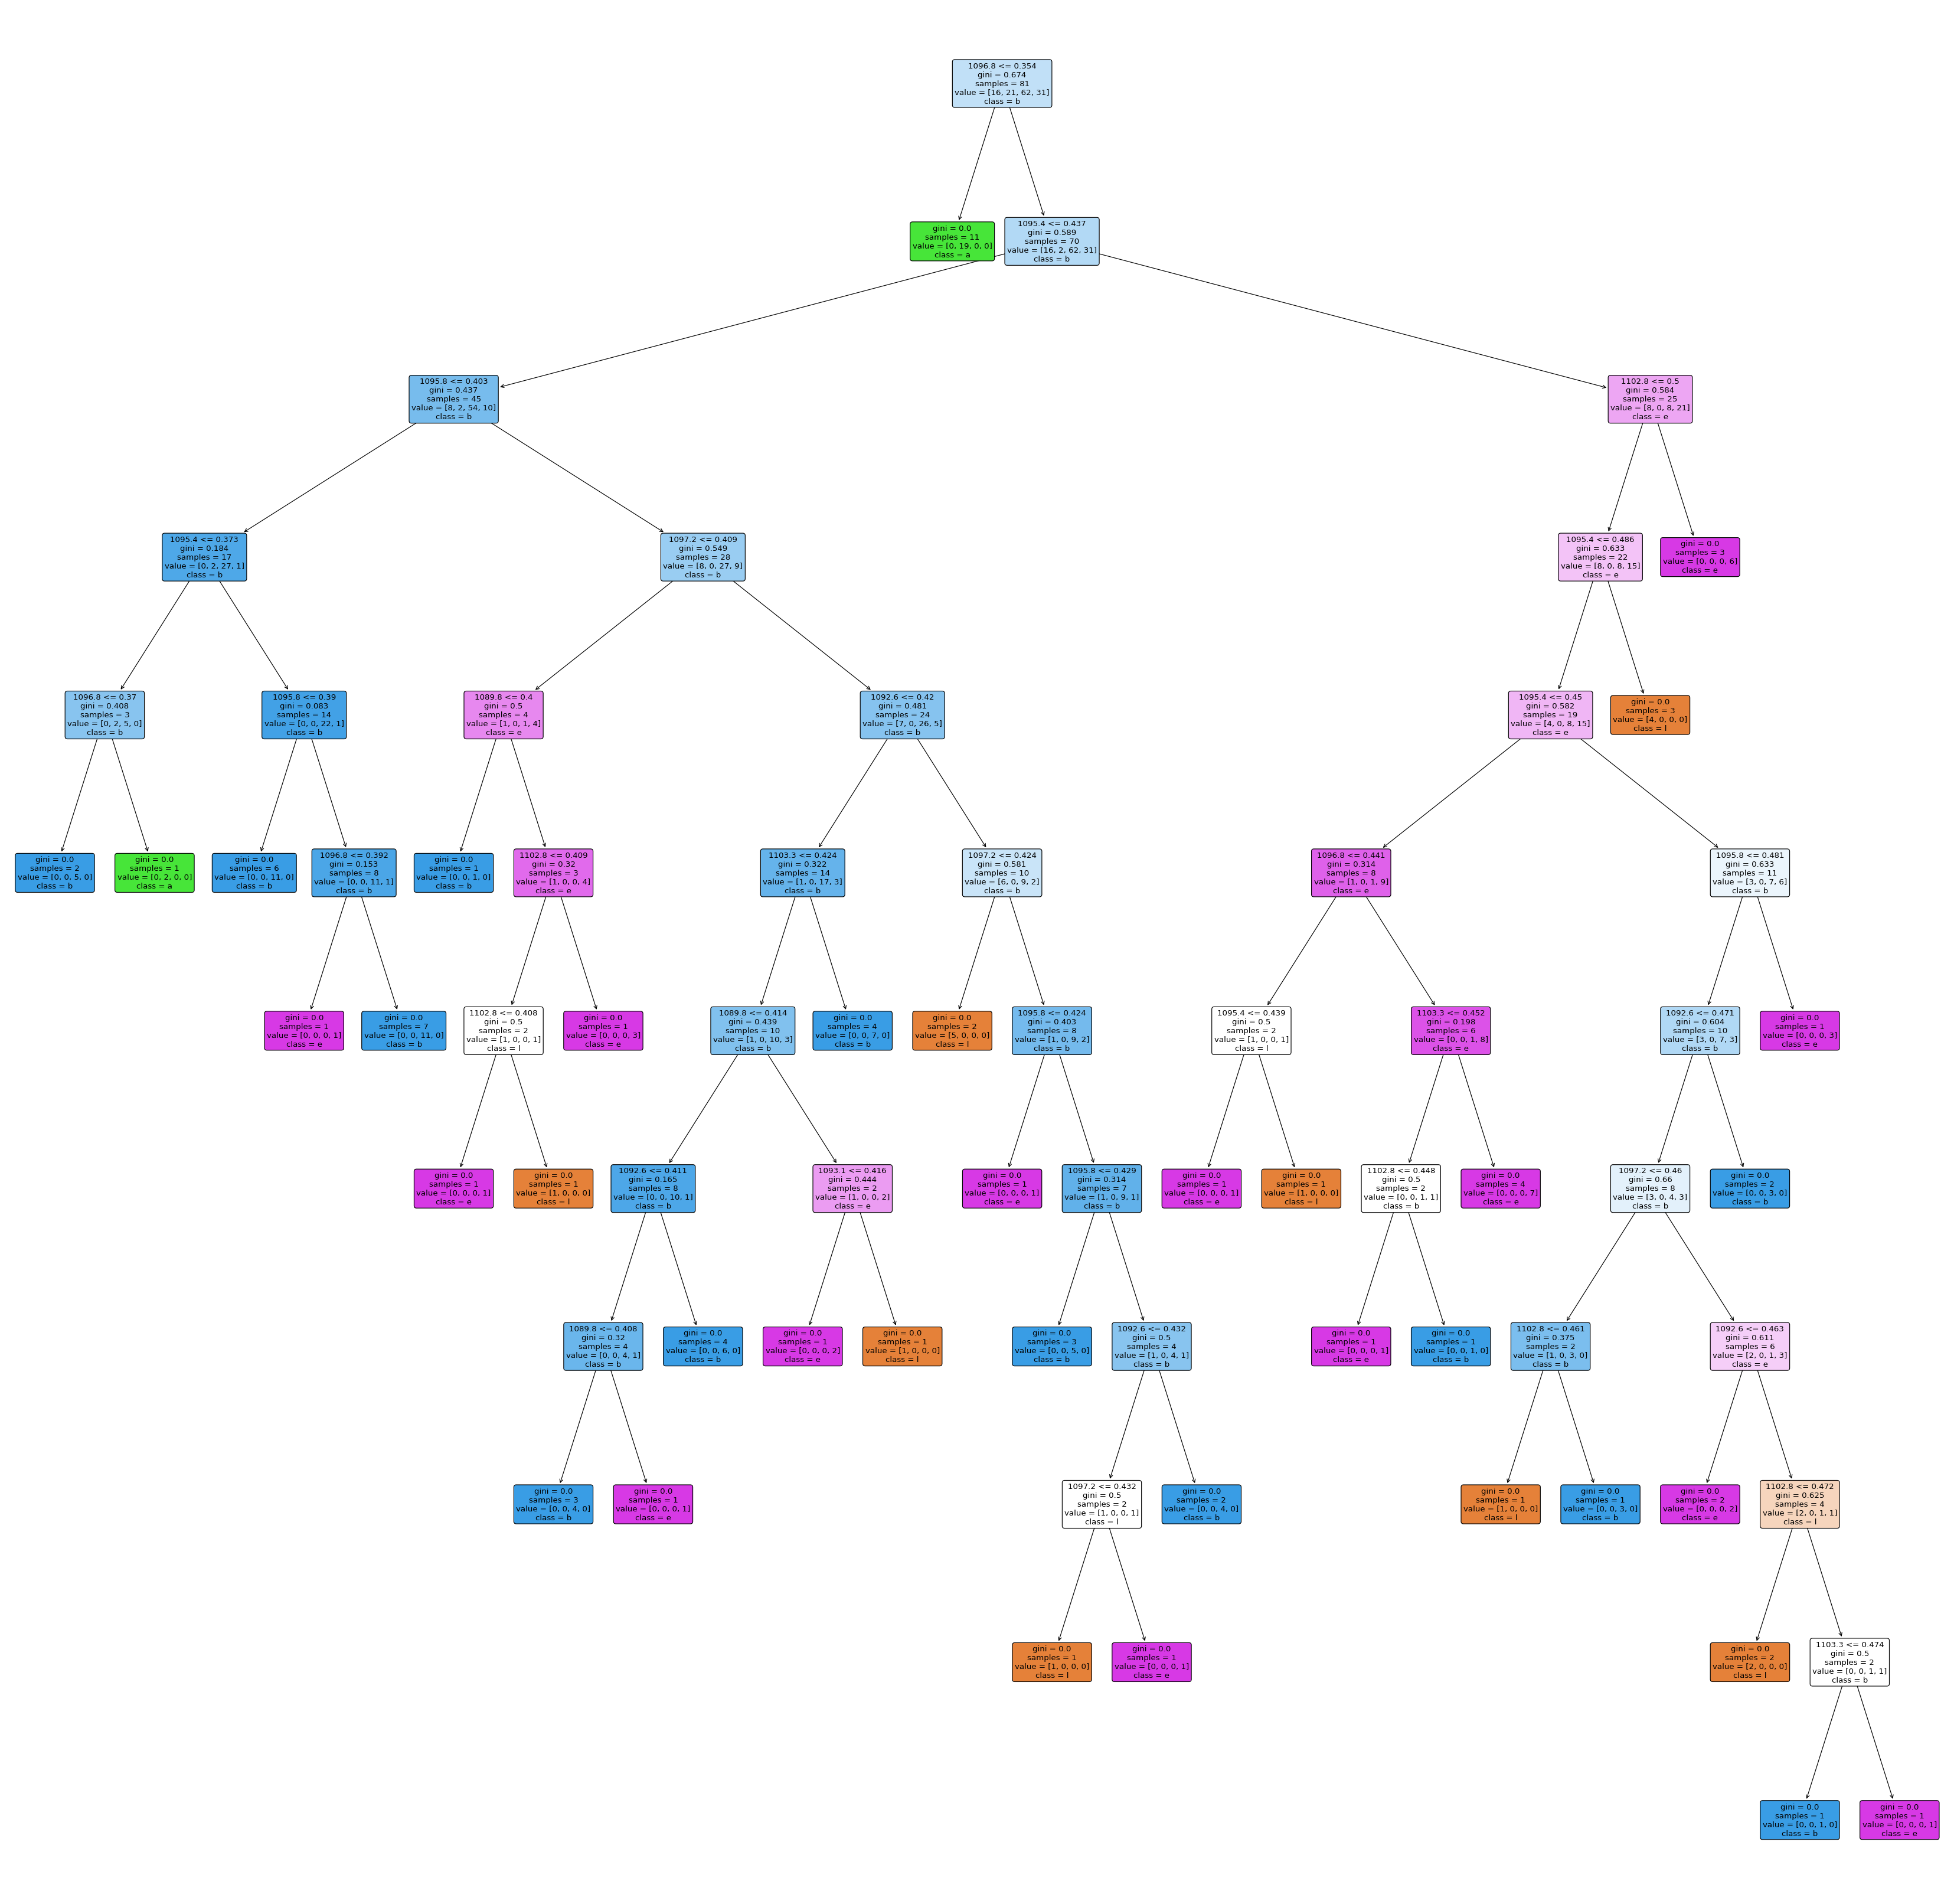

In [40]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(50, 50))
plot_tree(clf_rfe.estimators_[90], 
          feature_names=features_score.nlargest(30,columns="Score").iloc[0:10, 0].tolist(),
          class_names=df['label'].name,
          filled=True, impurity=True, 
          rounded=True)

In [41]:
fig.savefig('figure_name.png')

# Klasifikasi Support Vector Machine

Untuk train dan test set, serta cv-nya ambil dari yang Random Forest Classifier, sama aja 

## Testing Performa Model Support Vector Machine

In [48]:
features_score.nlargest(1000,columns="Score").iloc[0:1000, 0]

220     1092.6
221     1093.1
229     1096.8
214     1089.8
226     1095.4
         ...  
1146    1791.8
1149    1795.5
1188    1845.4
1147      1793
1148    1794.3
Name: Input_Features, Length: 1000, dtype: object

In [44]:
%%time

#tentukan metode scoring yang digunakan
scoring_svm = {'acc': 'accuracy',
               'prec_micro': 'precision_micro',
               'rec_micro': 'recall_micro'}

#tentukan total fitur yang digunakan dalam proses klasifikasi SVM ini
n_feat = range(1, 101)

for nfeat in n_feat:
        print("==================================================")
        start_time = time.time()
        
        #ambil n fitur input hasil seleksi fitur MI
        x_train_selected = x_train[features_score.nlargest(1000,columns="Score").iloc[0:nfeat, 0]]
        x_test_selected = x_test[features_score.nlargest(1000,columns="Score").iloc[0:nfeat, 0]]


        #Create a Support Vector Classifier
        clf_svm = svm.SVC()

        #Train the model using the training sets
        clf_svm.fit(x_train_selected, y_train)
        y_pred_svm = clf_svm.predict(x_test_selected)

        #hitung score model dari data train
        scores_svm = cross_validate(clf_svm, x_train_selected, y_train, scoring=scoring_svm, cv=cv, return_train_score=True)
        scores_svm2 = cross_validate(clf_svm, x_test_selected, y_test, scoring=scoring_svm, cv=cv, return_train_score=True)

        print("akurasi model SVM data Train dengan " + str(nfeat) + " fitur: " 
              + str(round(scores_svm['train_acc'].mean(), 2)))
        print("akurasi model SVM data Test dengan " + str(nfeat) + " fitur: " 
              + str(round(metrics.accuracy_score(y_test, y_pred_svm), 2)))
        print("Precision model SVM data Train dengan " + str(nfeat) + " fitur:"
              + str(round(scores_svm['train_prec_micro'].mean(), 2)))
        print("Precision model SVM data Test dengan " + str(nfeat) + " fitur:"
              + str(round(metrics.precision_score(y_test, y_pred_svm, average='micro'), 2)))
        print("Recall model SVM data Train dengan " + str(nfeat) + " fitur:"
              + str(round(scores_svm['train_rec_micro'].mean(), 2)))
        print("Recall model SVM data Test dengan " + str(nfeat) + " fitur:"
              + str(round(metrics.recall_score(y_test, y_pred_svm, average='micro'), 2)))
        print(" ")
        
        max_acc = 0
        max_prec = 0
        max_rec = 0
        
        if(round(metrics.accuracy_score(y_test, y_pred_svm), 2) > max_acc):
            max_acc = round(metrics.accuracy_score(y_test, y_pred_svm), 2)
        
        if(round(metrics.precision_score(y_test, y_pred_svm, average='micro'), 2) > max_prec):
            max_prec = round(metrics.precision_score(y_test, y_pred_svm, average='micro'), 2)
            
        if(round(metrics.recall_score(y_test, y_pred_svm, average='micro'), 2) > max_rec):
            max_rec = round(metrics.recall_score(y_test, y_pred_svm, average='micro'), 2)
            
        end_time = time.time()
        print("Total waktu: ", end_time - start_time)

print("====Nilai Performa Tertinggi====")
print("Nilai akurasi model tertinggi: " + str(max_acc))
print("Nilai presisi model tertinggi: " + str(max_prec))
print("Nilai Recall model tertinggi: " + str(max_rec))

akurasi model SVM data Train dengan 1 fitur: 0.71
akurasi model SVM data Test dengan 1 fitur: 0.74
Precision model SVM data Train dengan 1 fitur:0.71
Precision model SVM data Test dengan 1 fitur:0.68
Recall model SVM data Train dengan 1 fitur:0.71
Recall model SVM data Test dengan 1 fitur:0.68
 
Total waktu:  0.25750064849853516
akurasi model SVM data Train dengan 2 fitur: 0.72
akurasi model SVM data Test dengan 2 fitur: 0.74
Precision model SVM data Train dengan 2 fitur:0.72
Precision model SVM data Test dengan 2 fitur:0.68
Recall model SVM data Train dengan 2 fitur:0.72
Recall model SVM data Test dengan 2 fitur:0.68
 
Total waktu:  0.17939519882202148
akurasi model SVM data Train dengan 3 fitur: 0.72
akurasi model SVM data Test dengan 3 fitur: 0.74
Precision model SVM data Train dengan 3 fitur:0.72
Precision model SVM data Test dengan 3 fitur:0.68
Recall model SVM data Train dengan 3 fitur:0.72
Recall model SVM data Test dengan 3 fitur:0.68
 
Total waktu:  0.1832880973815918
akurasi 

akurasi model SVM data Train dengan 24 fitur: 0.71
akurasi model SVM data Test dengan 24 fitur: 0.74
Precision model SVM data Train dengan 24 fitur:0.71
Precision model SVM data Test dengan 24 fitur:0.68
Recall model SVM data Train dengan 24 fitur:0.71
Recall model SVM data Test dengan 24 fitur:0.68
 
Total waktu:  0.19529294967651367
akurasi model SVM data Train dengan 25 fitur: 0.71
akurasi model SVM data Test dengan 25 fitur: 0.74
Precision model SVM data Train dengan 25 fitur:0.71
Precision model SVM data Test dengan 25 fitur:0.68
Recall model SVM data Train dengan 25 fitur:0.71
Recall model SVM data Test dengan 25 fitur:0.68
 
Total waktu:  0.2029557228088379
akurasi model SVM data Train dengan 26 fitur: 0.71
akurasi model SVM data Test dengan 26 fitur: 0.74
Precision model SVM data Train dengan 26 fitur:0.71
Precision model SVM data Test dengan 26 fitur:0.68
Recall model SVM data Train dengan 26 fitur:0.71
Recall model SVM data Test dengan 26 fitur:0.68
 
Total waktu:  0.19643568

akurasi model SVM data Train dengan 46 fitur: 0.71
akurasi model SVM data Test dengan 46 fitur: 0.74
Precision model SVM data Train dengan 46 fitur:0.71
Precision model SVM data Test dengan 46 fitur:0.68
Recall model SVM data Train dengan 46 fitur:0.71
Recall model SVM data Test dengan 46 fitur:0.68
 
Total waktu:  0.22992992401123047
akurasi model SVM data Train dengan 47 fitur: 0.71
akurasi model SVM data Test dengan 47 fitur: 0.74
Precision model SVM data Train dengan 47 fitur:0.71
Precision model SVM data Test dengan 47 fitur:0.68
Recall model SVM data Train dengan 47 fitur:0.71
Recall model SVM data Test dengan 47 fitur:0.68
 
Total waktu:  0.18735814094543457
akurasi model SVM data Train dengan 48 fitur: 0.71
akurasi model SVM data Test dengan 48 fitur: 0.74
Precision model SVM data Train dengan 48 fitur:0.71
Precision model SVM data Test dengan 48 fitur:0.68
Recall model SVM data Train dengan 48 fitur:0.71
Recall model SVM data Test dengan 48 fitur:0.68
 
Total waktu:  0.2243955

akurasi model SVM data Train dengan 68 fitur: 0.71
akurasi model SVM data Test dengan 68 fitur: 0.74
Precision model SVM data Train dengan 68 fitur:0.71
Precision model SVM data Test dengan 68 fitur:0.68
Recall model SVM data Train dengan 68 fitur:0.71
Recall model SVM data Test dengan 68 fitur:0.68
 
Total waktu:  0.20388364791870117
akurasi model SVM data Train dengan 69 fitur: 0.71
akurasi model SVM data Test dengan 69 fitur: 0.74
Precision model SVM data Train dengan 69 fitur:0.71
Precision model SVM data Test dengan 69 fitur:0.68
Recall model SVM data Train dengan 69 fitur:0.71
Recall model SVM data Test dengan 69 fitur:0.68
 
Total waktu:  0.24177241325378418
akurasi model SVM data Train dengan 70 fitur: 0.71
akurasi model SVM data Test dengan 70 fitur: 0.74
Precision model SVM data Train dengan 70 fitur:0.71
Precision model SVM data Test dengan 70 fitur:0.68
Recall model SVM data Train dengan 70 fitur:0.71
Recall model SVM data Test dengan 70 fitur:0.68
 
Total waktu:  0.2180018

akurasi model SVM data Train dengan 90 fitur: 0.71
akurasi model SVM data Test dengan 90 fitur: 0.74
Precision model SVM data Train dengan 90 fitur:0.71
Precision model SVM data Test dengan 90 fitur:0.68
Recall model SVM data Train dengan 90 fitur:0.71
Recall model SVM data Test dengan 90 fitur:0.68
 
Total waktu:  0.2904233932495117
akurasi model SVM data Train dengan 91 fitur: 0.71
akurasi model SVM data Test dengan 91 fitur: 0.74
Precision model SVM data Train dengan 91 fitur:0.71
Precision model SVM data Test dengan 91 fitur:0.68
Recall model SVM data Train dengan 91 fitur:0.71
Recall model SVM data Test dengan 91 fitur:0.68
 
Total waktu:  0.28586912155151367
akurasi model SVM data Train dengan 92 fitur: 0.71
akurasi model SVM data Test dengan 92 fitur: 0.74
Precision model SVM data Train dengan 92 fitur:0.71
Precision model SVM data Test dengan 92 fitur:0.68
Recall model SVM data Train dengan 92 fitur:0.71
Recall model SVM data Test dengan 92 fitur:0.68
 
Total waktu:  0.25246930

KeyboardInterrupt: 

In [49]:
%%time

#tentukan metode scoring yang digunakan
scoring_svm = {'acc': 'accuracy',
               'prec_micro': 'precision_micro',
               'rec_micro': 'recall_micro'}

#tentukan total fitur yang digunakan dalam proses klasifikasi SVM ini
n_feat = range(1, 101)

for nfeat in n_feat:
        print("==================================================")
        start_time = time.time()
        
        #ambil n fitur input hasil seleksi fitur MI
        x_train_selected = x_train[features_score.nlargest(100,columns="Score").iloc[0:nfeat, 0]]
        x_test_selected = x_test[features_score.nlargest(100,columns="Score").iloc[0:nfeat, 0]]


        #Create a Support Vector Classifier
        clf_svm = svm.SVC()

        #Train the model using the training sets
        clf_svm.fit(x_train_selected, y_train)
        y_pred_svm = clf_svm.predict(x_test_selected)

        #hitung score model dari data train
        scores_svm = cross_validate(clf_svm, x_train_selected, y_train, scoring=scoring_svm, cv=cv, return_train_score=True)

        print("akurasi model SVM data Train dengan " + str(nfeat) + " fitur: " 
              + str(round(scores_svm['train_acc'].mean(), 2)))
        print("akurasi model SVM data Test dengan " + str(nfeat) + " fitur: " 
              + str(round(metrics.accuracy_score(y_test, y_pred_svm), 2)))
        print("Precision model SVM data Train dengan " + str(nfeat) + " fitur:"
              + str(round(scores_svm['train_prec_micro'].mean(), 2)))
        print("Precision model SVM data Test dengan " + str(nfeat) + " fitur:"
              + str(round(metrics.precision_score(y_test, y_pred_svm, average='micro'), 2)))
        print("Recall model SVM data Train dengan " + str(nfeat) + " fitur:"
              + str(round(scores_svm['train_rec_micro'].mean(), 2)))
        print("Recall model SVM data Test dengan " + str(nfeat) + " fitur:"
              + str(round(metrics.recall_score(y_test, y_pred_svm, average='micro'), 2)))
        print(" ")

        
        max_acc = 0
        max_prec = 0
        max_rec = 0
        
        if(round(metrics.accuracy_score(y_test, y_pred_svm), 2) > max_acc):
            max_acc = round(metrics.accuracy_score(y_test, y_pred_svm), 2)
        
        if(round(metrics.precision_score(y_test, y_pred_svm, average='micro'), 2) > max_prec):
            max_prec = round(metrics.precision_score(y_test, y_pred_svm, average='micro'), 2)
            
        if(round(metrics.recall_score(y_test, y_pred_svm, average='micro'), 2) > max_rec):
            max_rec = round(metrics.recall_score(y_test, y_pred_svm, average='micro'), 2)
            
        end_time = time.time()
        print("Total waktu: ", end_time - start_time)

print("====Nilai Performa Tertinggi====")
print("Nilai akurasi model tertinggi: " + str(max_acc))
print("Nilai presisi model tertinggi: " + str(max_prec))
print("Nilai Recall model tertinggi: " + str(max_rec))

akurasi model SVM data Train dengan 1 fitur: 0.71
akurasi model SVM data Test dengan 1 fitur: 0.68
Precision model SVM data Train dengan 1 fitur:0.71
Precision model SVM data Test dengan 1 fitur:0.68
Recall model SVM data Train dengan 1 fitur:0.71
Recall model SVM data Test dengan 1 fitur:0.68
 
Total waktu:  0.19483733177185059
akurasi model SVM data Train dengan 2 fitur: 0.72
akurasi model SVM data Test dengan 2 fitur: 0.68
Precision model SVM data Train dengan 2 fitur:0.72
Precision model SVM data Test dengan 2 fitur:0.68
Recall model SVM data Train dengan 2 fitur:0.72
Recall model SVM data Test dengan 2 fitur:0.68
 
Total waktu:  0.14927887916564941
akurasi model SVM data Train dengan 3 fitur: 0.72
akurasi model SVM data Test dengan 3 fitur: 0.68
Precision model SVM data Train dengan 3 fitur:0.72
Precision model SVM data Test dengan 3 fitur:0.68
Recall model SVM data Train dengan 3 fitur:0.72
Recall model SVM data Test dengan 3 fitur:0.68
 
Total waktu:  0.10555887222290039
akurasi

akurasi model SVM data Train dengan 24 fitur: 0.71
akurasi model SVM data Test dengan 24 fitur: 0.68
Precision model SVM data Train dengan 24 fitur:0.71
Precision model SVM data Test dengan 24 fitur:0.68
Recall model SVM data Train dengan 24 fitur:0.71
Recall model SVM data Test dengan 24 fitur:0.68
 
Total waktu:  0.09372115135192871
akurasi model SVM data Train dengan 25 fitur: 0.71
akurasi model SVM data Test dengan 25 fitur: 0.68
Precision model SVM data Train dengan 25 fitur:0.71
Precision model SVM data Test dengan 25 fitur:0.68
Recall model SVM data Train dengan 25 fitur:0.71
Recall model SVM data Test dengan 25 fitur:0.68
 
Total waktu:  0.11081528663635254
akurasi model SVM data Train dengan 26 fitur: 0.71
akurasi model SVM data Test dengan 26 fitur: 0.68
Precision model SVM data Train dengan 26 fitur:0.71
Precision model SVM data Test dengan 26 fitur:0.68
Recall model SVM data Train dengan 26 fitur:0.71
Recall model SVM data Test dengan 26 fitur:0.68
 
Total waktu:  0.0988624

akurasi model SVM data Train dengan 47 fitur: 0.71
akurasi model SVM data Test dengan 47 fitur: 0.68
Precision model SVM data Train dengan 47 fitur:0.71
Precision model SVM data Test dengan 47 fitur:0.68
Recall model SVM data Train dengan 47 fitur:0.71
Recall model SVM data Test dengan 47 fitur:0.68
 
Total waktu:  0.12198400497436523
akurasi model SVM data Train dengan 48 fitur: 0.71
akurasi model SVM data Test dengan 48 fitur: 0.68
Precision model SVM data Train dengan 48 fitur:0.71
Precision model SVM data Test dengan 48 fitur:0.68
Recall model SVM data Train dengan 48 fitur:0.71
Recall model SVM data Test dengan 48 fitur:0.68
 
Total waktu:  0.10452938079833984
akurasi model SVM data Train dengan 49 fitur: 0.71
akurasi model SVM data Test dengan 49 fitur: 0.68
Precision model SVM data Train dengan 49 fitur:0.71
Precision model SVM data Test dengan 49 fitur:0.68
Recall model SVM data Train dengan 49 fitur:0.71
Recall model SVM data Test dengan 49 fitur:0.68
 
Total waktu:  0.1023600

akurasi model SVM data Train dengan 69 fitur: 0.71
akurasi model SVM data Test dengan 69 fitur: 0.68
Precision model SVM data Train dengan 69 fitur:0.71
Precision model SVM data Test dengan 69 fitur:0.68
Recall model SVM data Train dengan 69 fitur:0.71
Recall model SVM data Test dengan 69 fitur:0.68
 
Total waktu:  0.11443781852722168
akurasi model SVM data Train dengan 70 fitur: 0.71
akurasi model SVM data Test dengan 70 fitur: 0.68
Precision model SVM data Train dengan 70 fitur:0.71
Precision model SVM data Test dengan 70 fitur:0.68
Recall model SVM data Train dengan 70 fitur:0.71
Recall model SVM data Test dengan 70 fitur:0.68
 
Total waktu:  0.13405752182006836
akurasi model SVM data Train dengan 71 fitur: 0.71
akurasi model SVM data Test dengan 71 fitur: 0.68
Precision model SVM data Train dengan 71 fitur:0.71
Precision model SVM data Test dengan 71 fitur:0.68
Recall model SVM data Train dengan 71 fitur:0.71
Recall model SVM data Test dengan 71 fitur:0.68
 
Total waktu:  0.1116743

akurasi model SVM data Train dengan 91 fitur: 0.71
akurasi model SVM data Test dengan 91 fitur: 0.68
Precision model SVM data Train dengan 91 fitur:0.71
Precision model SVM data Test dengan 91 fitur:0.68
Recall model SVM data Train dengan 91 fitur:0.71
Recall model SVM data Test dengan 91 fitur:0.68
 
Total waktu:  0.11559033393859863
akurasi model SVM data Train dengan 92 fitur: 0.71
akurasi model SVM data Test dengan 92 fitur: 0.68
Precision model SVM data Train dengan 92 fitur:0.71
Precision model SVM data Test dengan 92 fitur:0.68
Recall model SVM data Train dengan 92 fitur:0.71
Recall model SVM data Test dengan 92 fitur:0.68
 
Total waktu:  0.1128685474395752
akurasi model SVM data Train dengan 93 fitur: 0.71
akurasi model SVM data Test dengan 93 fitur: 0.68
Precision model SVM data Train dengan 93 fitur:0.71
Precision model SVM data Test dengan 93 fitur:0.68
Recall model SVM data Train dengan 93 fitur:0.71
Recall model SVM data Test dengan 93 fitur:0.68
 
Total waktu:  0.14116477

##### Note
- Variabel seperti scoring, clf, dan scores harus dibikin beda antara yang Random Forest sama SVM